### Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.  

### Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.  

### Finally, use filtering methods to select the five best features and justify your choices.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams['font.size'] = (16)

#### The chosen dataset are test scores for math, reading and writing along with some other student features.

In [22]:
# Import data into df_usd data frame
df_scores = pd.read_csv('studentsperformance.csv')

# print 1st 5 rows of df_usd (spot price)
df_scores.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [23]:
df_scores.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


### Outcome Variable:  math score - Did the student get at least a C on the math score ?

- Other variables:
    - Categorical:
        - gender
        - race/ethnicity
        - parent level of eduction
        - lunch
        - test preperation
    - Discrete:
        - reading score (ratio variable)
        - writing score (ratio variable)
    - Continuous:
        - Any average for either of the 3 tests or average by gender, race, preparation, etc.

### Exploring the data - Univariate:
- How many variables do I have?
    - 5 categorical and 3 continuous
- How many datapoints?
    - 1000 rows 
- Which variables are continuous (having an infinite number of possible values, such as age) and which are categorical (having a limited number of values, such as gender).
    - (see above)
- Do any of my variables have a known probability distribution (normal, Poisson, Gamma, etc)?
    - all 3 continuous variables look like they have a normal probablity distribution. (see below)
- Do I have missing data? If so, how much?
    - no missing data
- How much variance is there in each of my variables? If you’ve cleaned this dataset yourself, you’ll probably already know the answers to most of these questions.
    - (see below for variances of each of the 3 continuous variables.)

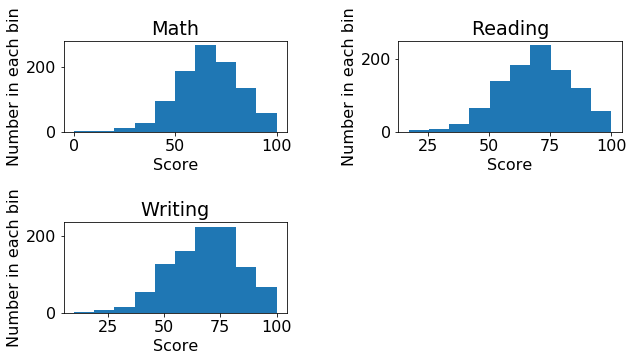

In [30]:
# Making a three-panel plot.
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df_scores['math score'])
plt.title('Math')
plt.xlabel('Score')
plt.ylabel('Number in each bin')

fig.add_subplot(222)
plt.hist(df_scores['reading score'])
plt.title('Reading')
plt.xlabel('Score')
plt.ylabel('Number in each bin')

plt.subplots_adjust(hspace=1.0, wspace=.5)

fig.add_subplot(223)
plt.hist(df_scores['writing score'])
plt.title('Writing')
plt.xlabel('Score')
plt.ylabel('Number in each bin')

plt.show()

In [37]:
print(df_scores.var(axis=0))

math score       229.918998
reading score    213.165605
writing score    230.907992
dtype: float64


In [38]:
print(df_scores.std(axis=0))

math score       15.163080
reading score    14.600192
writing score    15.195657
dtype: float64


### Exploring the data - Bivariate:
- The scatterplot
    - (see plots below)

- The correlation coefficient
    - r (math and reading) = **0.8175796636720539**
    - r (math and writing) = **0.8026420459498083**
    - r (reading and writitng) = **0.9545980771462479**
    - (see below for calculations)
- Look for: two-dimensional outliers that represent unusual combinations of values
    - no significant outliers

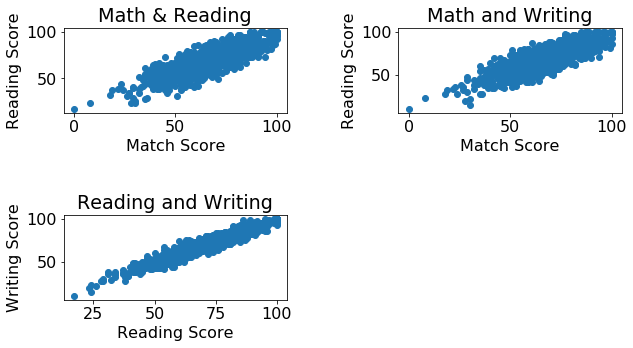

In [42]:
# Making a three-panel plot.
fig = plt.figure()

fig.add_subplot(221)
plt.scatter(df_scores['math score'], df_scores['reading score'])
plt.title('Math & Reading')
plt.xlabel('Match Score')
plt.ylabel('Reading Score')

fig.add_subplot(222)
plt.scatter(df_scores['math score'], df_scores['writing score'])
plt.title('Math and Writing')
plt.xlabel('Match Score')
plt.ylabel('Reading Score')

plt.subplots_adjust(hspace=1.2, wspace=.5)

fig.add_subplot(223)
plt.scatter(df_scores['reading score'], df_scores['writing score'])
plt.title('Reading and Writing')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')

plt.show()

In [45]:
df_scores['math score'].corr(df_scores['reading score'])

0.8175796636720539

In [49]:
df_scores['math score'].corr(df_scores['writing score'])

0.8026420459498083

In [48]:
df_scores['reading score'].corr(df_scores['writing score'])

0.9545980771462479

### 10 New Features
- hair color
    - categorical
    - probably very little correlation
- eye color
    - categorical
    - probably very little correlation
- height
    - categorical
    - probably very little correlation
- weight
    - categorical
    - probably very little correlation
- all scores (math, reading, writing) in the prior year
    - continuous - ratio
    - these values would probably be highly correlated and highly predictive to current data
- scores in other subjects such as history or chemistry
    - continuous - ratio
    - also would be highly correlated to scores in this dataset
- income level of parents
    - continuous - level
    - may be correlated ---> possibly similar to comparison with 'lunch' data
- brother or sister scores from years prior or the same year
    - continuos - ratio
    - probably highly correlated with this data since many other variable would be the same
- do they have a tutor or have they had a tutor in the past
    - categorical
    - could be fairly correlated with scores data
- number of times their parents helped them with their studies in the past year
    - continuous - ratio
    - probably correlated with scores
- number of hours spent studying for the test
    - continuous
    - could be correlated with scores

### 5 Best Features - Scatterplots and r calculation could be use for all of these to justify. 
1.  Scores in other subjects. 
    - we know from the scatterplots that scores from one subject to the next are highly correlated.
2.  Scores in previous year. 
    - Same student and most if not all of the same variables.
3.  Scores in other subjects such as history or chemistry.
    - Most likely, a good student in one subject will be a good student in another subject.
4.  Number of hours spend studyting for the test.
    - Not only would this activity likely yield better results, it also shows motivation and discipline.
5.  Number of times parents helped with studies in past year.
    - This shows parental support which is probably important.